<a href="https://colab.research.google.com/github/kurokirin/Year3-2/blob/master/Adastra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
import io

Saving dataset.csv to dataset.csv


In [6]:
data = pd.read_csv(io.BytesIO(uploaded['dataset.csv']))

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
data.head()

,timest,station,param,level,isinvalid
0,2016-01-20 16:00:00,1.0,1,81.79,0
1,2016-01-20 16:00:00,2.0,1,106.47,0
2,2016-01-20 16:00:00,3.0,1,121.81,0
3,2016-01-20 16:00:00,4.0,1,140.35,0
4,2016-01-20 16:00:00,5.0,1,25.27,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252199 entries, 0 to 1252198
Data columns (total 5 columns):
timest       1252199 non-null object
station      1252198 non-null float64
param        1252199 non-null int64
level        1252198 non-null float64
isinvalid    1252199 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 47.8+ MB


In [9]:
miss = data.loc[:,data.isnull().any()]
print(miss)

         station   level
0            1.0   81.79
1            2.0  106.47
2            3.0  121.81
3            4.0  140.35
4            5.0   25.27
...          ...     ...
1252194      5.0    0.00
1252195      5.0    0.00
1252196      6.0    0.00
1252197      6.0    0.00
1252198      6.0    0.00

[1252199 rows x 2 columns]


In [10]:
import numpy as np
meanLevel = np.mean(data.level)
meanStation = np.mean(data.station)
print(meanLevel)
print(meanStation)

84.64469952034447
3.467162541387225


In [13]:
meanStation = int(meanStation)
print(meanStation)

3


In [0]:
data['station'] = data['station'].fillna(meanStation)
data['level'] = data['level'].fillna(meanLevel)

In [15]:
miss = data.loc[:,data.isnull().any()]
print(miss)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[1252199 rows x 0 columns]


In [0]:
data['station'] = data['station'].astype('int64')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252199 entries, 0 to 1252198
Data columns (total 5 columns):
timest       1252199 non-null object
station      1252199 non-null int64
param        1252199 non-null int64
level        1252199 non-null float64
isinvalid    1252199 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 47.8+ MB


In [19]:
data.duplicated().any()

True

In [0]:
data.drop_duplicates(['timest','station','param','level','isinvalid'], inplace=True)

In [0]:
data.reset_index(drop=True, inplace=True)

In [22]:
data.duplicated().any()

False

In [23]:
data.head()

,timest,station,param,level,isinvalid
0,2016-01-20 16:00:00,1,1,81.79,0
1,2016-01-20 16:00:00,2,1,106.47,0
2,2016-01-20 16:00:00,3,1,121.81,0
3,2016-01-20 16:00:00,4,1,140.35,0
4,2016-01-20 16:00:00,5,1,25.27,0


In [0]:
data['timest'] = pd.to_datetime(data['timest'], errors='coerce')

In [25]:
data.timest.isnull().any()

True

In [26]:
exceed = data[(data['station']<1)|(data['station']>6)]
print(exceed)

                     timest  station  param   level isinvalid
882938  2017-10-13 22:00:00       10      8  955.97         0
1218476 2018-05-27 21:00:00       -1      9    0.00         0


In [27]:
data = data.drop(882938, axis=0)
data = data.drop(1218476, axis=0)
data.reset_index(drop=True)

,timest,station,param,level,isinvalid
0,2016-01-20 16:00:00,1,1,81.79,0
1,2016-01-20 16:00:00,2,1,106.47,0
2,2016-01-20 16:00:00,3,1,121.81,0
3,2016-01-20 16:00:00,4,1,140.35,0
4,2016-01-20 16:00:00,5,1,25.27,0
...,...,...,...,...,...
1252191,2018-06-19 10:00:00,5,10,0.00,0
1252192,2018-06-19 10:00:00,5,11,0.00,0
1252193,2018-06-19 10:00:00,6,9,0.00,0
1252194,2018-06-19 10:00:00,6,10,0.00,0


In [28]:
exceed = data[(data['param']<0)|(data['param']>11)]
print(exceed)

Empty DataFrame
Columns: [timest, station, param, level, isinvalid]
Index: []


In [29]:
data.isinvalid.dtype

dtype('O')

In [0]:
data['isinvalid'] = pd.to_numeric(data['isinvalid'], errors ='coerce')

In [31]:
data.isinvalid.isnull().any()

True

In [0]:
data.isinvalid = data.isinvalid.fillna(0)

In [33]:
data.isinvalid.isnull().any()
data.isinvalid.dtype

dtype('float64')

In [0]:
data['isinvalid'] = data['isinvalid'].astype('int64')

In [58]:
exceed = data[(data['isinvalid']<0)|(data['isinvalid']>1)]
print(exceed)

                     timest  station  param  level  isinvalid
1164907 2018-04-22 12:00:00        3      4   0.03          2


In [59]:
data = data.drop(1164907, axis=0)
data.reset_index(drop=True)

,timest,station,param,level,isinvalid
0,2016-01-20 16:00:00,1,1,81.79,0
1,2016-01-20 16:00:00,2,1,106.47,0
2,2016-01-20 16:00:00,3,1,121.81,0
3,2016-01-20 16:00:00,4,1,140.35,0
4,2016-01-20 16:00:00,5,1,25.27,0
...,...,...,...,...,...
1252190,2018-06-19 10:00:00,5,10,0.00,0
1252191,2018-06-19 10:00:00,5,11,0.00,0
1252192,2018-06-19 10:00:00,6,9,0.00,0
1252193,2018-06-19 10:00:00,6,10,0.00,0


In [0]:
data['timest'] = data.timest.fillna(pd.Timestamp('20160229'))

In [0]:
data['timest'] = pd.to_datetime(data['timest'], errors='raise')

In [72]:
exceed = data[(data['level']<0)]
print(exceed)

                     timest  station  param  level  isinvalid
54      2016-01-20 16:00:00        1     11  -8.43          0
55      2016-01-20 16:00:00        2     11  -9.04          0
56      2016-01-20 16:00:00        3     11  -2.92          0
57      2016-01-20 16:00:00        4     11  -5.96          0
58      2016-01-20 16:00:00        5     11  -1.67          0
...                     ...      ...    ...    ...        ...
1247053 2018-06-15 09:00:00        5      6  -0.55          0
1247114 2018-06-15 10:00:00        5      6  -0.40          0
1247177 2018-06-15 11:00:00        5      6  -0.08          0
1247491 2018-06-15 16:00:00        5      2  -0.11          0
1247557 2018-06-15 17:00:00        5      2  -0.09          0

[20851 rows x 5 columns]


In [0]:
data['level'] = abs(data['level'])

In [74]:
exceed = data[(data['level']<0)]
print(exceed)

Empty DataFrame
Columns: [timest, station, param, level, isinvalid]
Index: []


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1252195 entries, 0 to 1252197
Data columns (total 5 columns):
timest       1252195 non-null datetime64[ns]
station      1252195 non-null int64
param        1252195 non-null int64
level        1252195 non-null float64
isinvalid    1252195 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 57.3 MB


In [0]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [77]:
data.corr()

,station,param,level,isinvalid
station,1.000000,-0.017988,-0.053282,0.016923
param,-0.017988,1.000000,0.191648,0.054631
level,-0.053282,0.191648,1.000000,0.029572
isinvalid,0.016923,0.054631,0.029572,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b2a1be710>,
      dtype=object)

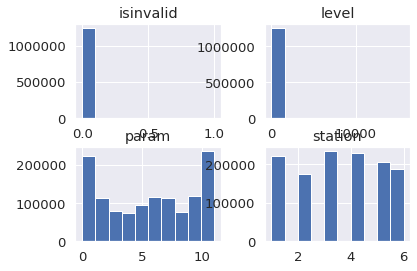

In [78]:
data.hist()

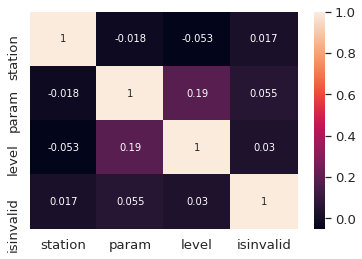

In [79]:
corr = data.corr()
f, ax = plt.subplots()
cmap = sns.diverging_palette(4, 4, as_cmap=True)
correlation = sns.heatmap(corr, annot=True)

In [0]:
def scatterplot(x_data, y_data, x_label="", y_label="", title="", color = "r", yscale_log=False):

    # Create the plot object
    _, ax = plt.subplots()

    # Plot the data, set the size (s), color and transparency (alpha)
    # of the points
    ax.scatter(x_data, y_data, s = 10, color = color, alpha = 0.75)

    if yscale_log == True:
        ax.set_yscale('log')

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

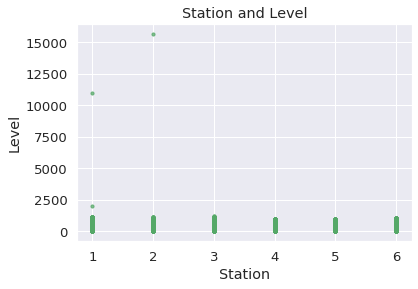

In [81]:
scatterplot(data['station'],data['level'],"Station","Level","Station and Level","g")

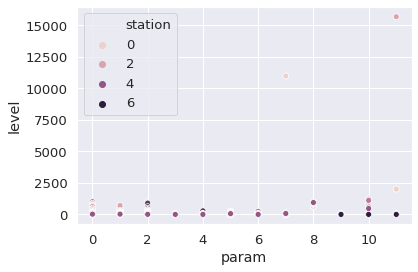

In [82]:
plt.subplots()
sns.set(font_scale=1.2)
ax = sns.scatterplot(x="param", y="level", hue='station', data=data)

KeyboardInterrupt: ignored

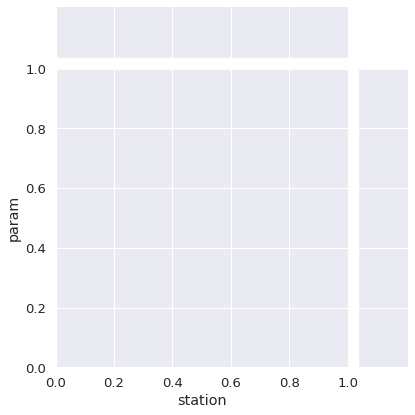

In [83]:
g = sns.jointplot(x="station", y="param", data = data[(data.level< 150)],kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$Station$", "$Param$")
ax.set_title('Distribution of Param and station for levels less than 150')

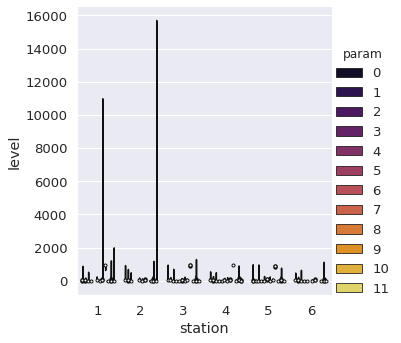

In [84]:
sns.catplot(x="station", y="level", hue="param", kind="violin", palette = 'inferno', data=data)